# Imports 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import graphviz
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import warnings
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
warnings.filterwarnings('ignore')

import os
import random
import tensorflow as tf
seed_value= 661

plt.style.use('ggplot') #https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
%matplotlib inline

D:\anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\anaconda\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
D:\anaconda\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Data setup

In [2]:
data_bench = pd.read_pickle("data/course_and_uni_1819.pkl")
data_covid = pd.read_pickle("data/course_and_uni_2122.pkl")

#drop not needed columns - no point in keeping uni and course as we don't have future data (duh)
data_bench.drop(["uni","course"],inplace = True, axis = "columns")
data_covid.drop(["uni","course"], inplace = True, axis = "columns")

<AxesSubplot: title={'center': '2021-2022'}>

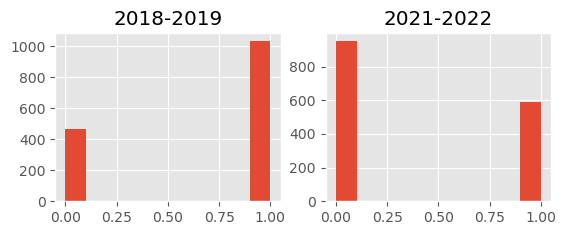

In [3]:
data_bench.Q27 = data_bench.Q27.apply(lambda x: 1 if x >= 0.8 else 0)
plt.subplot(2,2,1)
plt.title("2018-2019")
data_bench.Q27.hist()

data_covid.Q27 = data_covid.Q27.apply(lambda x: 1 if x >= 0.8 else 0)
plt.subplot(2,2,2)
plt.title("2021-2022")
data_covid.Q27.hist()

In [4]:
#split data
x_train_bench, x_test_bench, y_train_bench, y_test_bench = train_test_split(data_bench.iloc[:,:26], data_bench.iloc[:,26], test_size=0.25, stratify= data_bench.iloc[:,26], shuffle = True, random_state=661)
x_train_covid, x_test_covid, y_train_covid, y_test_covid = train_test_split(data_covid.iloc[:,:26], data_covid.iloc[:,26], test_size=0.25, stratify = data_covid.iloc[:,26], shuffle = True, random_state=661)
x_train_bench

,Q01,Q02,Q03,Q04,Q05,Q06,Q07,Q08,Q09,Q10,...,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26
894,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,...,1.000000,0.857850,0.92895,1.000000,0.92895,0.92895,0.928950,1.000000,0.899550,0.822900
406,0.942075,0.902800,0.898350,0.902825,0.914575,0.910075,0.850900,0.82350,0.792775,0.79030,...,0.843300,0.868475,0.88945,0.858125,0.77160,0.89800,0.874775,0.818900,0.714600,0.620600
1323,0.919600,0.896650,0.945050,0.837300,0.913450,0.877850,0.772050,0.72720,0.815350,0.79175,...,0.808650,0.736250,0.86480,0.841400,0.68800,0.71785,0.826900,0.759550,0.537750,0.286550
738,0.858350,0.757550,0.817400,0.789800,0.841150,0.866750,0.783100,0.86945,0.816500,0.76365,...,0.774600,0.922200,0.90010,0.891650,0.74130,0.88095,0.836600,0.778100,0.732200,0.622800
25,0.660700,0.666650,0.511900,0.482150,0.541650,0.815500,0.851200,0.66070,0.738100,0.54165,...,0.596150,0.541650,0.72435,0.773800,0.39285,0.80950,0.654800,0.434500,0.315500,0.348450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,0.937350,0.925550,0.851050,0.842900,0.846050,0.856050,0.842900,0.79055,0.837900,0.73660,...,0.664750,0.777300,0.91120,0.796050,0.76160,0.85420,0.834200,0.826050,0.729200,0.635825
1145,0.905850,0.841200,0.904700,0.786250,0.855150,0.855150,0.725350,0.70405,0.740100,0.65805,...,0.787150,0.880750,0.88720,0.907950,0.62825,0.79520,0.885050,0.744850,0.505850,0.460350
1159,0.916225,0.905925,0.898125,0.864850,0.878050,0.899450,0.886125,0.79560,0.778125,0.79280,...,0.794275,0.851200,0.85555,0.836500,0.82980,0.88785,0.876100,0.831275,0.677725,0.548400
1416,0.908825,0.837400,0.823100,0.834625,0.898775,0.868975,0.820925,0.76485,0.770200,0.87055,...,0.802025,0.830675,0.89745,0.847200,0.71805,0.91215,0.897350,0.828000,0.728650,0.575075


# Algorithms

In [10]:
def get_scores(clf, x_test, y_test):
    preds = clf.best_estimator_.predict(x_test)
    acc = clf.best_estimator_.score(x_test_bench, y_test_bench)
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 score: {f1_score(y_test, preds):.4f}")

    scores = cross_val_score(clf.best_estimator_, x_test, y_test, cv=10)
    print(f"CV train score: {clf.best_score_:.4f}")
    print(f"CV test score: {scores.mean():.4f}")

    cm = metrics.confusion_matrix(y_test, preds)
    #print(cm)
    sns.heatmap(cm, cmap = "Blues", annot=True, fmt='d')
    print(f"Best params: {clf.best_params_}")

#### Logistic regression 

Train acc: 0.9081996434937611
Accuracy: 0.8640
F1 score: 0.9014
CV train score: 0.8939
CV test score: 0.8613
Best params: {'C': 0.001, 'penalty': 'none', 'solver': 'lbfgs'}
Wall time: 8.97 s


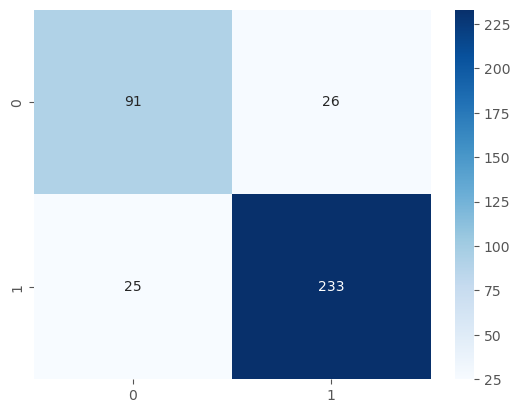

In [11]:
%%time

params_logreg = dict(C = [0.001, 0.01, 0.1], penalty = ['l2', 'l1' ,'none'], solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
gridsearch_logregb = GridSearchCV(LogisticRegression(random_state = 661), params_logreg, cv = 10)
gridsearch_logregb.fit(x_train_bench, y_train_bench)

#get metrics
print(f"Train acc: {gridsearch_logregb.score(x_train_bench, y_train_bench)}")
get_scores(gridsearch_logregb, x_test_bench, y_test_bench)


Train acc: 0.9057093425605537
Accuracy: 0.8667
F1 score: 0.8522
CV train score: 0.9023
CV test score: 0.8861
Best params: {'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg'}
Wall time: 9.04 s


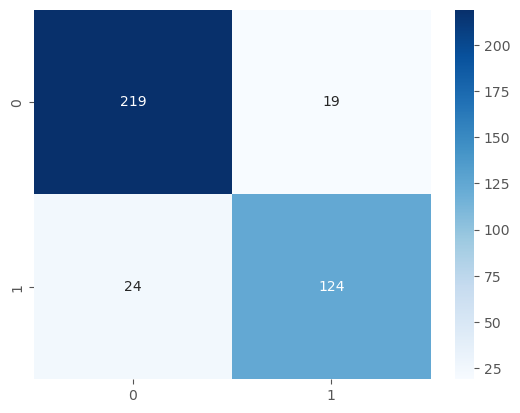

In [12]:
%%time

params_logreg = dict(C = [0.001, 0.01, 0.1], penalty = ['l2', 'l1' ,'none'], solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
gridsearch_logregc = GridSearchCV(LogisticRegression(random_state = 661), params_logreg, cv = 10)
gridsearch_logregc.fit(x_train_covid, y_train_covid)

#get metrics
print(f"Train acc: {gridsearch_logregc.score(x_train_covid, y_train_covid)}")
get_scores(gridsearch_logregc, x_test_covid, y_test_covid)

#### Decision tree

Train acc: 0.9331550802139037
Accuracy: 0.8133
F1 score: 0.8659
CV train score: 0.8600
CV test score: 0.7649
Best params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
Wall time: 24.9 s


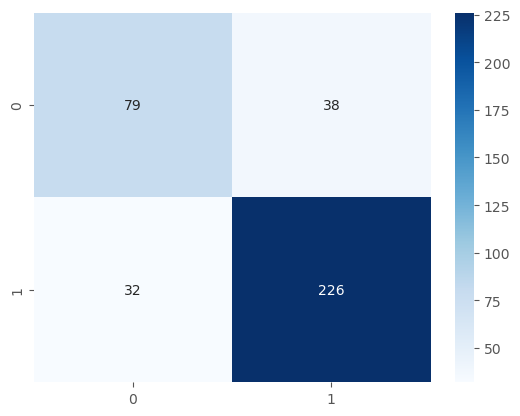

In [13]:
%%time

params_tree = dict(min_samples_split = range(1,10) , max_depth = range(1,10), criterion = ["gini", "entropy", "log_loss"])
gridsearch_dtreeb = GridSearchCV(tree.DecisionTreeClassifier(random_state = 661), params_tree, cv = 10)
gridsearch_dtreeb.fit(x_train_bench, y_train_bench)

#get metrics
print(f"Train acc: {gridsearch_dtreeb.score(x_train_bench, y_train_bench)}")
get_scores(gridsearch_dtreeb, x_test_bench, y_test_bench)

Train acc: 0.8996539792387543
Accuracy: 0.8000
F1 score: 0.8119
CV train score: 0.8754
CV test score: 0.8264
Best params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Wall time: 25.4 s


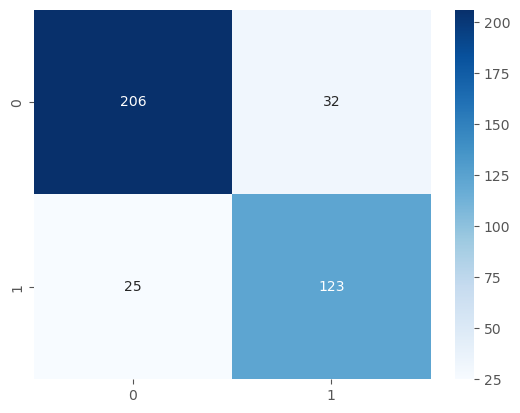

In [14]:
%%time

params_tree = dict(min_samples_split = range(1,10) , max_depth = range(1,10), criterion = ["gini", "entropy", "log_loss"])
gridsearch_dtreec = GridSearchCV(tree.DecisionTreeClassifier(random_state = 661), params_tree, cv = 10)
gridsearch_dtreec.fit(x_train_covid, y_train_covid)

#get metrics
print(f"Train acc: {gridsearch_dtreec.score(x_train_covid, y_train_covid)}")
get_scores(gridsearch_dtreec, x_test_covid, y_test_covid)

In [15]:
#save actual dt for analysis
dot_data = tree.export_graphviz(gridsearch_dtreeb.best_estimator_, out_file=None) 
graph = graphviz.Source(dot_data)
graph.render("dtreeb")

dot_data = tree.export_graphviz(gridsearch_dtreec.best_estimator_, out_file=None) 
graph = graphviz.Source(dot_data)
graph.render("dtreec") 

'dtreec.pdf'

#### Random forest

Train acc: 0.9099821746880571
Accuracy: 0.8747
F1 score: 0.9118
CV train score: 0.8842
CV test score: 0.8584
Best params: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Wall time: 44.6 s


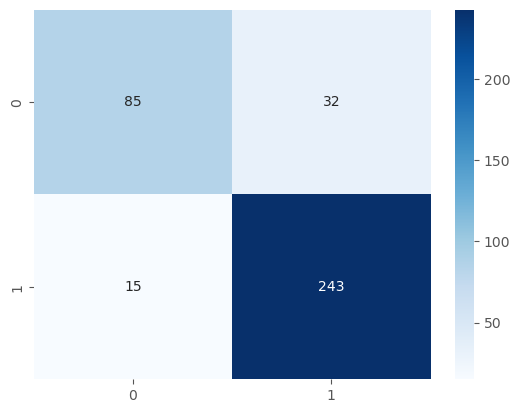

In [16]:
%%time

params_rf = dict(min_samples_split = range(1,3) , max_depth = range(1,5), bootstrap = [True, False], criterion = ["gini", "entropy"])
gridsearch_rfb = GridSearchCV(RandomForestClassifier(random_state = 661), params_rf, cv = 10)
gridsearch_rfb.fit(x_train_bench, y_train_bench)

#get metrics
print(f"Train acc: {gridsearch_rfb.score(x_train_bench, y_train_bench)}")
get_scores(gridsearch_rfb, x_test_bench, y_test_bench)

Train acc: 0.9403114186851211
Accuracy: 0.8507
F1 score: 0.8464
CV train score: 0.8936
CV test score: 0.8889
Best params: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}
Wall time: 45.3 s


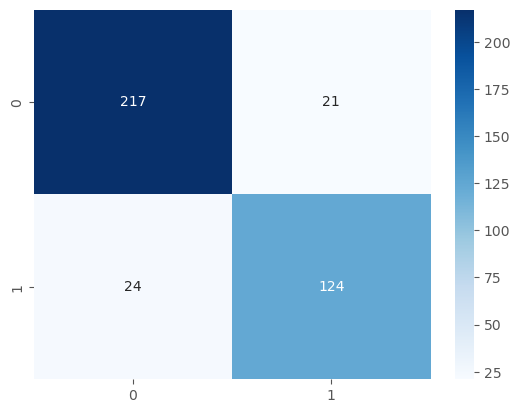

In [17]:
%%time

params_rf = dict(min_samples_split = range(1,3) , max_depth = range(1,5), bootstrap = [True, False], criterion = ["gini", "entropy"])
gridsearch_rfc = GridSearchCV(RandomForestClassifier(random_state = 661), params_rf, cv = 10)
gridsearch_rfc.fit(x_train_covid, y_train_covid)

#get metrics
print(f"Train acc: {gridsearch_rfc.score(x_train_covid, y_train_covid)}")
get_scores(gridsearch_rfc, x_test_covid, y_test_covid)

#### Artificial neural network

##### Benchmark

In [18]:
NUM_EPOCHS = 1500
#upper limit lr: 0.1
#lower limit lr: 0.00001
#candidate lr: 0.01, 0.001, 0.0001
LR = 0.0001
BATCH_SIZE = 32

In [19]:
#reproducability
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

#model build
model = Sequential([
    Dense(100, input_shape=(x_train_bench.shape[1],), activation = "relu",  kernel_initializer='glorot_uniform'),
    Dense(50, activation = "relu"),
    Dense(1, activation = "sigmoid")
])

opt = tf.keras.optimizers.Adam(learning_rate=LR)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2700      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 7,801
Trainable params: 7,801
Non-trainable params: 0
_________________________________________________________________


In [20]:
history_bench = model.fit(x_train_bench, y_train_bench, epochs = NUM_EPOCHS, batch_size = BATCH_SIZE, validation_split = 0.2)

Epoch 1/1500
29/29 [==============================] - 2s 10ms/step - loss: 0.7967 - accuracy: 0.3043 - val_loss: 0.7043 - val_accuracy: 0.3333
Epoch 2/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.6590 - accuracy: 0.6522 - val_loss: 0.6362 - val_accuracy: 0.6667
Epoch 3/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.6111 - accuracy: 0.6945 - val_loss: 0.6181 - val_accuracy: 0.6667
Epoch 4/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.5955 - accuracy: 0.6945 - val_loss: 0.6158 - val_accuracy: 0.6667
Epoch 5/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.5923 - accuracy: 0.6945 - val_loss: 0.6155 - val_accuracy: 0.6667
Epoch 6/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.5916 - accuracy: 0.6945 - val_loss: 0.6137 - val_accuracy: 0.6667
Epoch 7/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.5905 - accuracy: 0.6945 - val_loss: 0.6126 - val_accuracy: 0.6667
Epoch

29/29 [==============================] - 0s 3ms/step - loss: 0.5273 - accuracy: 0.7191 - val_loss: 0.5497 - val_accuracy: 0.6844
Epoch 59/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.5253 - accuracy: 0.7213 - val_loss: 0.5491 - val_accuracy: 0.6844
Epoch 60/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.5246 - accuracy: 0.7157 - val_loss: 0.5467 - val_accuracy: 0.6844
Epoch 61/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.5218 - accuracy: 0.7224 - val_loss: 0.5460 - val_accuracy: 0.6844
Epoch 62/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.5224 - accuracy: 0.7168 - val_loss: 0.5425 - val_accuracy: 0.6889
Epoch 63/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.5217 - accuracy: 0.7291 - val_loss: 0.5417 - val_accuracy: 0.6889
Epoch 64/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.5181 - accuracy: 0.7280 - val_loss: 0.5396 - val_accuracy: 0.6889
Epoch 65/1500

29/29 [==============================] - 0s 3ms/step - loss: 0.4411 - accuracy: 0.7837 - val_loss: 0.4527 - val_accuracy: 0.7689
Epoch 116/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.4392 - accuracy: 0.7804 - val_loss: 0.4534 - val_accuracy: 0.7422
Epoch 117/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.4392 - accuracy: 0.7826 - val_loss: 0.4483 - val_accuracy: 0.8044
Epoch 118/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.4419 - accuracy: 0.8027 - val_loss: 0.4494 - val_accuracy: 0.7600
Epoch 119/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.7938 - val_loss: 0.4453 - val_accuracy: 0.8000
Epoch 120/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.4398 - accuracy: 0.7982 - val_loss: 0.4522 - val_accuracy: 0.7378
Epoch 121/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.4341 - accuracy: 0.7915 - val_loss: 0.4445 - val_accuracy: 0.7778
Epoch 1

Epoch 172/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3940 - accuracy: 0.8172 - val_loss: 0.3938 - val_accuracy: 0.8089
Epoch 173/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3931 - accuracy: 0.8071 - val_loss: 0.3892 - val_accuracy: 0.8311
Epoch 174/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3908 - accuracy: 0.8116 - val_loss: 0.3888 - val_accuracy: 0.8311
Epoch 175/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3991 - accuracy: 0.8172 - val_loss: 0.3902 - val_accuracy: 0.8178
Epoch 176/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3960 - accuracy: 0.8194 - val_loss: 0.3923 - val_accuracy: 0.8089
Epoch 177/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3886 - accuracy: 0.8172 - val_loss: 0.3864 - val_accuracy: 0.8311
Epoch 178/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.3914 - accuracy: 0.8149 - val_loss: 0.3943 - val_accuracy:

Epoch 229/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3683 - accuracy: 0.8172 - val_loss: 0.3580 - val_accuracy: 0.8489
Epoch 230/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3667 - accuracy: 0.8261 - val_loss: 0.3603 - val_accuracy: 0.8356
Epoch 231/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.3668 - accuracy: 0.8216 - val_loss: 0.3572 - val_accuracy: 0.8533
Epoch 232/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.3657 - accuracy: 0.8261 - val_loss: 0.3638 - val_accuracy: 0.8267
Epoch 233/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3645 - accuracy: 0.8272 - val_loss: 0.3577 - val_accuracy: 0.8356
Epoch 234/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3658 - accuracy: 0.8294 - val_loss: 0.3577 - val_accuracy: 0.8356
Epoch 235/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3670 - accuracy: 0.8250 - val_loss: 0.3649 - val_accuracy:

Epoch 286/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.3503 - accuracy: 0.8317 - val_loss: 0.3436 - val_accuracy: 0.8444
Epoch 287/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.3462 - accuracy: 0.8372 - val_loss: 0.3375 - val_accuracy: 0.8489
Epoch 288/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.3457 - accuracy: 0.8372 - val_loss: 0.3392 - val_accuracy: 0.8400
Epoch 289/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3461 - accuracy: 0.8350 - val_loss: 0.3412 - val_accuracy: 0.8444
Epoch 290/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3455 - accuracy: 0.8372 - val_loss: 0.3379 - val_accuracy: 0.8622
Epoch 291/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3545 - accuracy: 0.8417 - val_loss: 0.3391 - val_accuracy: 0.8444
Epoch 292/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.3447 - accuracy: 0.8395 - val_loss: 0.3358 - val_accuracy:

Epoch 343/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.3314 - accuracy: 0.8462 - val_loss: 0.3241 - val_accuracy: 0.8489
Epoch 344/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.3315 - accuracy: 0.8495 - val_loss: 0.3283 - val_accuracy: 0.8400
Epoch 345/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.3311 - accuracy: 0.8484 - val_loss: 0.3215 - val_accuracy: 0.8622
Epoch 346/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.3357 - accuracy: 0.8450 - val_loss: 0.3231 - val_accuracy: 0.8622
Epoch 347/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.3303 - accuracy: 0.8506 - val_loss: 0.3314 - val_accuracy: 0.8400
Epoch 348/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3394 - accuracy: 0.8428 - val_loss: 0.3307 - val_accuracy: 0.8356
Epoch 349/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3435 - accuracy: 0.8305 - val_loss: 0.3228 - val_accuracy:

Epoch 400/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.3190 - accuracy: 0.8562 - val_loss: 0.3165 - val_accuracy: 0.8444
Epoch 401/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3210 - accuracy: 0.8462 - val_loss: 0.3117 - val_accuracy: 0.8711
Epoch 402/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3202 - accuracy: 0.8540 - val_loss: 0.3112 - val_accuracy: 0.8667
Epoch 403/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.3201 - accuracy: 0.8573 - val_loss: 0.3167 - val_accuracy: 0.8444
Epoch 404/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3184 - accuracy: 0.8517 - val_loss: 0.3109 - val_accuracy: 0.8667
Epoch 405/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3201 - accuracy: 0.8528 - val_loss: 0.3162 - val_accuracy: 0.8444
Epoch 406/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3195 - accuracy: 0.8528 - val_loss: 0.3120 - val_accuracy:

Epoch 457/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3170 - accuracy: 0.8640 - val_loss: 0.3107 - val_accuracy: 0.8489
Epoch 458/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3125 - accuracy: 0.8584 - val_loss: 0.3030 - val_accuracy: 0.8756
Epoch 459/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3115 - accuracy: 0.8640 - val_loss: 0.3024 - val_accuracy: 0.8756
Epoch 460/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.3073 - accuracy: 0.8606 - val_loss: 0.3232 - val_accuracy: 0.8444
Epoch 461/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3369 - accuracy: 0.8361 - val_loss: 0.3080 - val_accuracy: 0.8756
Epoch 462/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3124 - accuracy: 0.8651 - val_loss: 0.3020 - val_accuracy: 0.8756
Epoch 463/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.3152 - accuracy: 0.8618 - val_loss: 0.3131 - val_accuracy:

Epoch 514/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3004 - accuracy: 0.8729 - val_loss: 0.2996 - val_accuracy: 0.8578
Epoch 515/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3038 - accuracy: 0.8673 - val_loss: 0.2978 - val_accuracy: 0.8711
Epoch 516/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3027 - accuracy: 0.8673 - val_loss: 0.2967 - val_accuracy: 0.8711
Epoch 517/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3049 - accuracy: 0.8606 - val_loss: 0.3039 - val_accuracy: 0.8533
Epoch 518/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3050 - accuracy: 0.8685 - val_loss: 0.2958 - val_accuracy: 0.8667
Epoch 519/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.8707 - val_loss: 0.2966 - val_accuracy: 0.8711
Epoch 520/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3125 - accuracy: 0.8662 - val_loss: 0.3085 - val_accuracy:

Epoch 571/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2967 - accuracy: 0.8685 - val_loss: 0.2927 - val_accuracy: 0.8711
Epoch 572/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2935 - accuracy: 0.8751 - val_loss: 0.2908 - val_accuracy: 0.8844
Epoch 573/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2937 - accuracy: 0.8707 - val_loss: 0.2922 - val_accuracy: 0.8711
Epoch 574/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2935 - accuracy: 0.8696 - val_loss: 0.2974 - val_accuracy: 0.8578
Epoch 575/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2934 - accuracy: 0.8740 - val_loss: 0.2915 - val_accuracy: 0.8711
Epoch 576/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2929 - accuracy: 0.8740 - val_loss: 0.3011 - val_accuracy: 0.8533
Epoch 577/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.3075 - accuracy: 0.8528 - val_loss: 0.2908 - val_accuracy:

Epoch 628/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2868 - accuracy: 0.8763 - val_loss: 0.2866 - val_accuracy: 0.8800
Epoch 629/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2858 - accuracy: 0.8763 - val_loss: 0.2884 - val_accuracy: 0.8756
Epoch 630/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2858 - accuracy: 0.8785 - val_loss: 0.2995 - val_accuracy: 0.8533
Epoch 631/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2900 - accuracy: 0.8651 - val_loss: 0.2856 - val_accuracy: 0.8933
Epoch 632/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2879 - accuracy: 0.8696 - val_loss: 0.2871 - val_accuracy: 0.8889
Epoch 633/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2880 - accuracy: 0.8796 - val_loss: 0.2958 - val_accuracy: 0.8578
Epoch 634/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2870 - accuracy: 0.8751 - val_loss: 0.2887 - val_accuracy:

Epoch 685/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2897 - accuracy: 0.8818 - val_loss: 0.2929 - val_accuracy: 0.8533
Epoch 686/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2840 - accuracy: 0.8740 - val_loss: 0.2883 - val_accuracy: 0.8622
Epoch 687/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2830 - accuracy: 0.8763 - val_loss: 0.2839 - val_accuracy: 0.8756
Epoch 688/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2793 - accuracy: 0.8796 - val_loss: 0.2856 - val_accuracy: 0.8756
Epoch 689/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2792 - accuracy: 0.8763 - val_loss: 0.2841 - val_accuracy: 0.8844
Epoch 690/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2912 - accuracy: 0.8740 - val_loss: 0.2828 - val_accuracy: 0.8844
Epoch 691/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2799 - accuracy: 0.8796 - val_loss: 0.2841 - val_accuracy:

Epoch 742/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2773 - accuracy: 0.8807 - val_loss: 0.2797 - val_accuracy: 0.8756
Epoch 743/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2739 - accuracy: 0.8841 - val_loss: 0.2888 - val_accuracy: 0.8578
Epoch 744/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2736 - accuracy: 0.8785 - val_loss: 0.2784 - val_accuracy: 0.8889
Epoch 745/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2819 - accuracy: 0.8751 - val_loss: 0.2832 - val_accuracy: 0.8889
Epoch 746/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2784 - accuracy: 0.8807 - val_loss: 0.2853 - val_accuracy: 0.8667
Epoch 747/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2738 - accuracy: 0.8796 - val_loss: 0.2819 - val_accuracy: 0.8756
Epoch 748/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2740 - accuracy: 0.8807 - val_loss: 0.2819 - val_accuracy:

Epoch 799/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2692 - accuracy: 0.8774 - val_loss: 0.2757 - val_accuracy: 0.8844
Epoch 800/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2697 - accuracy: 0.8841 - val_loss: 0.2851 - val_accuracy: 0.8578
Epoch 801/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2680 - accuracy: 0.8829 - val_loss: 0.2781 - val_accuracy: 0.8756
Epoch 802/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2810 - accuracy: 0.8807 - val_loss: 0.2865 - val_accuracy: 0.8978
Epoch 803/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2857 - accuracy: 0.8807 - val_loss: 0.2796 - val_accuracy: 0.8667
Epoch 804/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2670 - accuracy: 0.8829 - val_loss: 0.2734 - val_accuracy: 0.8889
Epoch 805/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2675 - accuracy: 0.8785 - val_loss: 0.2757 - val_accuracy:

Epoch 856/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2658 - accuracy: 0.8829 - val_loss: 0.2781 - val_accuracy: 0.8711
Epoch 857/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2645 - accuracy: 0.8829 - val_loss: 0.2727 - val_accuracy: 0.8800
Epoch 858/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2675 - accuracy: 0.8863 - val_loss: 0.2741 - val_accuracy: 0.8844
Epoch 859/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2648 - accuracy: 0.8874 - val_loss: 0.2717 - val_accuracy: 0.8800
Epoch 860/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2636 - accuracy: 0.8852 - val_loss: 0.2714 - val_accuracy: 0.8800
Epoch 861/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2605 - accuracy: 0.8952 - val_loss: 0.3002 - val_accuracy: 0.8578
Epoch 862/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2717 - accuracy: 0.8774 - val_loss: 0.2747 - val_accuracy:

Epoch 913/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2616 - accuracy: 0.8930 - val_loss: 0.2699 - val_accuracy: 0.8711
Epoch 914/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2589 - accuracy: 0.8863 - val_loss: 0.2710 - val_accuracy: 0.8800
Epoch 915/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2587 - accuracy: 0.8829 - val_loss: 0.2683 - val_accuracy: 0.8889
Epoch 916/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2686 - accuracy: 0.8718 - val_loss: 0.2829 - val_accuracy: 0.8578
Epoch 917/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2569 - accuracy: 0.8863 - val_loss: 0.2716 - val_accuracy: 0.8800
Epoch 918/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2658 - accuracy: 0.8785 - val_loss: 0.2670 - val_accuracy: 0.8800
Epoch 919/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2607 - accuracy: 0.8885 - val_loss: 0.2682 - val_accuracy:

Epoch 970/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2547 - accuracy: 0.8874 - val_loss: 0.2738 - val_accuracy: 0.8711
Epoch 971/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2535 - accuracy: 0.8818 - val_loss: 0.2694 - val_accuracy: 0.8800
Epoch 972/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2547 - accuracy: 0.8885 - val_loss: 0.2679 - val_accuracy: 0.8800
Epoch 973/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2550 - accuracy: 0.8885 - val_loss: 0.2661 - val_accuracy: 0.8756
Epoch 974/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2552 - accuracy: 0.8885 - val_loss: 0.2647 - val_accuracy: 0.8756
Epoch 975/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2528 - accuracy: 0.8885 - val_loss: 0.2874 - val_accuracy: 0.8622
Epoch 976/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2683 - accuracy: 0.8729 - val_loss: 0.2644 - val_accuracy:

Epoch 1027/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2753 - accuracy: 0.8807 - val_loss: 0.2742 - val_accuracy: 0.8711
Epoch 1028/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2515 - accuracy: 0.8863 - val_loss: 0.2647 - val_accuracy: 0.8711
Epoch 1029/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2511 - accuracy: 0.8907 - val_loss: 0.2692 - val_accuracy: 0.8756
Epoch 1030/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2517 - accuracy: 0.8841 - val_loss: 0.2756 - val_accuracy: 0.8711
Epoch 1031/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2509 - accuracy: 0.8874 - val_loss: 0.2753 - val_accuracy: 0.8711
Epoch 1032/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2526 - accuracy: 0.8952 - val_loss: 0.2652 - val_accuracy: 0.8844
Epoch 1033/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2501 - accuracy: 0.8885 - val_loss: 0.2680 - val_ac

29/29 [==============================] - 0s 2ms/step - loss: 0.2596 - accuracy: 0.8852 - val_loss: 0.2932 - val_accuracy: 0.8711
Epoch 1084/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2506 - accuracy: 0.8907 - val_loss: 0.2620 - val_accuracy: 0.8756
Epoch 1085/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2452 - accuracy: 0.8919 - val_loss: 0.2697 - val_accuracy: 0.8756
Epoch 1086/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2597 - accuracy: 0.8751 - val_loss: 0.2583 - val_accuracy: 0.8844
Epoch 1087/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2565 - accuracy: 0.8852 - val_loss: 0.2652 - val_accuracy: 0.8711
Epoch 1088/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2475 - accuracy: 0.8863 - val_loss: 0.2639 - val_accuracy: 0.8756
Epoch 1089/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2449 - accuracy: 0.8885 - val_loss: 0.2587 - val_accuracy: 0.8844
E

29/29 [==============================] - 0s 3ms/step - loss: 0.2691 - accuracy: 0.8829 - val_loss: 0.2619 - val_accuracy: 0.8933
Epoch 1140/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2438 - accuracy: 0.8907 - val_loss: 0.2562 - val_accuracy: 0.8756
Epoch 1141/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2416 - accuracy: 0.8963 - val_loss: 0.2700 - val_accuracy: 0.8711
Epoch 1142/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2417 - accuracy: 0.8952 - val_loss: 0.2770 - val_accuracy: 0.8933
Epoch 1143/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2684 - accuracy: 0.8629 - val_loss: 0.2688 - val_accuracy: 0.8800
Epoch 1144/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2447 - accuracy: 0.8907 - val_loss: 0.2636 - val_accuracy: 0.8756
Epoch 1145/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2558 - accuracy: 0.8863 - val_loss: 0.2576 - val_accuracy: 0.8889
E

29/29 [==============================] - 0s 2ms/step - loss: 0.2390 - accuracy: 0.8941 - val_loss: 0.2672 - val_accuracy: 0.8800
Epoch 1196/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2419 - accuracy: 0.8863 - val_loss: 0.2555 - val_accuracy: 0.8844
Epoch 1197/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2575 - accuracy: 0.8941 - val_loss: 0.2551 - val_accuracy: 0.8844
Epoch 1198/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2525 - accuracy: 0.8896 - val_loss: 0.2751 - val_accuracy: 0.8756
Epoch 1199/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2445 - accuracy: 0.8919 - val_loss: 0.2771 - val_accuracy: 0.8756
Epoch 1200/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2499 - accuracy: 0.8896 - val_loss: 0.2509 - val_accuracy: 0.8800
Epoch 1201/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2408 - accuracy: 0.8919 - val_loss: 0.2546 - val_accuracy: 0.8933
E

29/29 [==============================] - 0s 2ms/step - loss: 0.2430 - accuracy: 0.8986 - val_loss: 0.2614 - val_accuracy: 0.8756
Epoch 1252/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2358 - accuracy: 0.8930 - val_loss: 0.2516 - val_accuracy: 0.8844
Epoch 1253/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2353 - accuracy: 0.8952 - val_loss: 0.2626 - val_accuracy: 0.8756
Epoch 1254/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2345 - accuracy: 0.8963 - val_loss: 0.2536 - val_accuracy: 0.8844
Epoch 1255/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2356 - accuracy: 0.8907 - val_loss: 0.2601 - val_accuracy: 0.8800
Epoch 1256/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2369 - accuracy: 0.8930 - val_loss: 0.2535 - val_accuracy: 0.8889
Epoch 1257/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2386 - accuracy: 0.8941 - val_loss: 0.2508 - val_accuracy: 0.8800
E

29/29 [==============================] - 0s 2ms/step - loss: 0.2367 - accuracy: 0.8952 - val_loss: 0.2494 - val_accuracy: 0.8844
Epoch 1308/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2317 - accuracy: 0.8974 - val_loss: 0.2654 - val_accuracy: 0.8844
Epoch 1309/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2346 - accuracy: 0.8974 - val_loss: 0.2709 - val_accuracy: 0.8800
Epoch 1310/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2338 - accuracy: 0.8941 - val_loss: 0.2506 - val_accuracy: 0.8756
Epoch 1311/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2534 - accuracy: 0.8829 - val_loss: 0.2496 - val_accuracy: 0.8800
Epoch 1312/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2476 - accuracy: 0.9030 - val_loss: 0.2485 - val_accuracy: 0.8844
Epoch 1313/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2353 - accuracy: 0.8952 - val_loss: 0.2511 - val_accuracy: 0.8844
E

29/29 [==============================] - 0s 2ms/step - loss: 0.2387 - accuracy: 0.8952 - val_loss: 0.2467 - val_accuracy: 0.8800
Epoch 1364/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2408 - accuracy: 0.9019 - val_loss: 0.2468 - val_accuracy: 0.8800
Epoch 1365/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2317 - accuracy: 0.8952 - val_loss: 0.2533 - val_accuracy: 0.8844
Epoch 1366/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2322 - accuracy: 0.8963 - val_loss: 0.2815 - val_accuracy: 0.8756
Epoch 1367/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2633 - accuracy: 0.8885 - val_loss: 0.2596 - val_accuracy: 0.8844
Epoch 1368/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2303 - accuracy: 0.8997 - val_loss: 0.2499 - val_accuracy: 0.8844
Epoch 1369/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2358 - accuracy: 0.9019 - val_loss: 0.2481 - val_accuracy: 0.8800
E

29/29 [==============================] - 0s 2ms/step - loss: 0.2286 - accuracy: 0.8930 - val_loss: 0.2554 - val_accuracy: 0.8889
Epoch 1420/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2289 - accuracy: 0.8896 - val_loss: 0.2475 - val_accuracy: 0.8844
Epoch 1421/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2275 - accuracy: 0.9008 - val_loss: 0.2713 - val_accuracy: 0.8800
Epoch 1422/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2322 - accuracy: 0.8930 - val_loss: 0.2445 - val_accuracy: 0.8844
Epoch 1423/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2299 - accuracy: 0.8952 - val_loss: 0.2448 - val_accuracy: 0.8844
Epoch 1424/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2289 - accuracy: 0.9019 - val_loss: 0.2466 - val_accuracy: 0.8800
Epoch 1425/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2274 - accuracy: 0.9052 - val_loss: 0.2453 - val_accuracy: 0.8889
E

29/29 [==============================] - 0s 2ms/step - loss: 0.2283 - accuracy: 0.8941 - val_loss: 0.2535 - val_accuracy: 0.8933
Epoch 1476/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2453 - accuracy: 0.8941 - val_loss: 0.2445 - val_accuracy: 0.8844
Epoch 1477/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2306 - accuracy: 0.9052 - val_loss: 0.2520 - val_accuracy: 0.8844
Epoch 1478/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2241 - accuracy: 0.8997 - val_loss: 0.2439 - val_accuracy: 0.8844
Epoch 1479/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2434 - accuracy: 0.8997 - val_loss: 0.2444 - val_accuracy: 0.8844
Epoch 1480/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2527 - accuracy: 0.8829 - val_loss: 0.2461 - val_accuracy: 0.8844
Epoch 1481/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2263 - accuracy: 0.8952 - val_loss: 0.2461 - val_accuracy: 0.8844
E

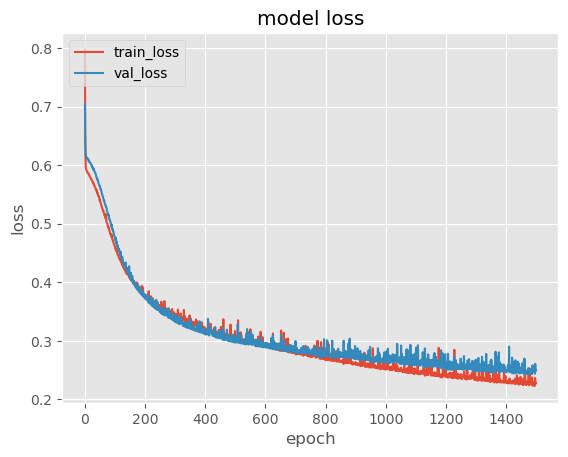

In [21]:
plt.plot(history_bench.history['loss'])
plt.plot(history_bench.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left')
plt.show()

Train accuracy: 0.9011
Test accuracy: 0.8587
F1 score: 0.894


<AxesSubplot: >

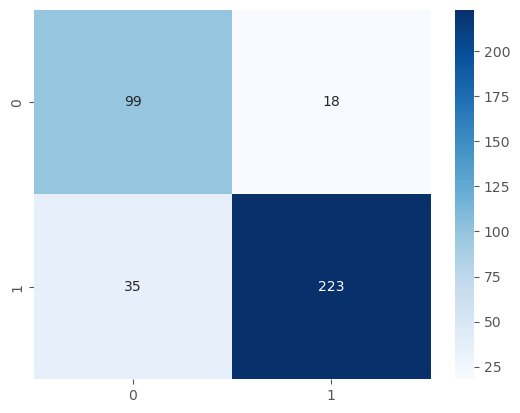

In [22]:
#convert to 0 or 1
preds = (model.predict(x_test_bench) > 0.5).astype(int)

print(f'Train accuracy: {model.evaluate(x_train_bench, y_train_bench, verbose = 0)[1]:.4f}')
print(f'Test accuracy: {model.evaluate(x_test_bench, y_test_bench, verbose = 0)[1]:.4f}')
print(f"F1 score: {f1_score(y_test_bench, preds):.3f}")

cm = metrics.confusion_matrix(y_test_bench, preds)
sns.heatmap(cm, cmap = "Blues", annot=True, fmt='d')

In [259]:
%%time

###############CV###############
#reproducability
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

inputs = np.concatenate((x_train_bench, x_test_bench), axis=0)
targets = np.concatenate((y_train_bench, y_test_bench), axis=0)
acc_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=10, shuffle=True)

# K-fold Cross Validation model evaluation
for train, test in kfold.split(inputs, targets):
    model = Sequential([
                        Dense(100, input_shape=(x_train_bench.shape[1],), activation = "relu",  kernel_initializer='glorot_uniform'),
                        Dense(50, activation = "relu"),
                        Dense(1, activation = "sigmoid")
                        ])

    # Compile the model
    model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
                metrics=['accuracy'])

    # Fit data to model
    history = model.fit(inputs[train], targets[train], batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, verbose = 0)

    # Generate generalization metrics
    acc_per_fold.append(model.evaluate(inputs[test], targets[test], verbose=0)[1])

print(f"CV accuracy: {np.mean(acc_per_fold)}")
###############CV###############

CV accuracy: 0.8757986545562744
Wall time: 13min 5s


##### Covid

In [23]:
NUM_EPOCHS = 1500
#upper limit lr: 0.1
#lower limit lr: 0.00001
#candidate lr: 0.01, 0.001, 0.0001
LR = 0.0001
BATCH_SIZE = 32

In [24]:
#reproducability
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

#model build
model = Sequential([
    Dense(100, input_shape=(x_train_covid.shape[1],), activation = "relu",  kernel_initializer='glorot_uniform'),
    Dense(50, activation = "relu"),
    Dense(1, activation = "sigmoid")
])

opt = tf.keras.optimizers.Adam(learning_rate=LR)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               2700      
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 7,801
Trainable params: 7,801
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(x_train_covid, y_train_covid, epochs = NUM_EPOCHS, batch_size = BATCH_SIZE, validation_split = 0.2)

Epoch 1/1500
29/29 [==============================] - 1s 6ms/step - loss: 0.6895 - accuracy: 0.6061 - val_loss: 0.6664 - val_accuracy: 0.6552
Epoch 2/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.6810 - accuracy: 0.6061 - val_loss: 0.6663 - val_accuracy: 0.6552
Epoch 3/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.6061 - val_loss: 0.6632 - val_accuracy: 0.6552
Epoch 4/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.6783 - accuracy: 0.6061 - val_loss: 0.6603 - val_accuracy: 0.6552
Epoch 5/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.6750 - accuracy: 0.6061 - val_loss: 0.6621 - val_accuracy: 0.6552
Epoch 6/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.6726 - accuracy: 0.6061 - val_loss: 0.6583 - val_accuracy: 0.6552
Epoch 7/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.6713 - accuracy: 0.6061 - val_loss: 0.6561 - val_accuracy: 0.6552
Epoch 

29/29 [==============================] - 0s 2ms/step - loss: 0.5196 - accuracy: 0.7781 - val_loss: 0.5009 - val_accuracy: 0.7802
Epoch 59/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.5168 - accuracy: 0.7825 - val_loss: 0.4995 - val_accuracy: 0.7845
Epoch 60/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.5140 - accuracy: 0.7814 - val_loss: 0.4973 - val_accuracy: 0.7802
Epoch 61/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.5104 - accuracy: 0.7879 - val_loss: 0.4916 - val_accuracy: 0.7802
Epoch 62/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.5085 - accuracy: 0.7781 - val_loss: 0.4904 - val_accuracy: 0.7888
Epoch 63/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.5054 - accuracy: 0.7781 - val_loss: 0.4924 - val_accuracy: 0.8017
Epoch 64/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.5045 - accuracy: 0.7662 - val_loss: 0.4830 - val_accuracy: 0.7759
Epoch 65/1500

29/29 [==============================] - 0s 3ms/step - loss: 0.4124 - accuracy: 0.8258 - val_loss: 0.3868 - val_accuracy: 0.8190
Epoch 116/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.4124 - accuracy: 0.8160 - val_loss: 0.3841 - val_accuracy: 0.8276
Epoch 117/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8139 - val_loss: 0.3834 - val_accuracy: 0.8405
Epoch 118/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.4100 - accuracy: 0.8160 - val_loss: 0.3813 - val_accuracy: 0.8276
Epoch 119/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.8268 - val_loss: 0.3798 - val_accuracy: 0.8276
Epoch 120/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.8149 - val_loss: 0.3867 - val_accuracy: 0.8491
Epoch 121/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.4063 - accuracy: 0.8203 - val_loss: 0.3803 - val_accuracy: 0.8190
Epoch 1

Epoch 172/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3618 - accuracy: 0.8431 - val_loss: 0.3283 - val_accuracy: 0.8707
Epoch 173/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3621 - accuracy: 0.8474 - val_loss: 0.3245 - val_accuracy: 0.8578
Epoch 174/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3580 - accuracy: 0.8452 - val_loss: 0.3305 - val_accuracy: 0.8750
Epoch 175/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3598 - accuracy: 0.8431 - val_loss: 0.3249 - val_accuracy: 0.8578
Epoch 176/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3561 - accuracy: 0.8431 - val_loss: 0.3250 - val_accuracy: 0.8707
Epoch 177/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3573 - accuracy: 0.8452 - val_loss: 0.3224 - val_accuracy: 0.8578
Epoch 178/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3552 - accuracy: 0.8485 - val_loss: 0.3200 - val_accuracy:

Epoch 229/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3294 - accuracy: 0.8593 - val_loss: 0.2943 - val_accuracy: 0.8922
Epoch 230/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3282 - accuracy: 0.8593 - val_loss: 0.2884 - val_accuracy: 0.8750
Epoch 231/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3260 - accuracy: 0.8593 - val_loss: 0.2935 - val_accuracy: 0.8922
Epoch 232/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3249 - accuracy: 0.8550 - val_loss: 0.2916 - val_accuracy: 0.8879
Epoch 233/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3260 - accuracy: 0.8571 - val_loss: 0.2871 - val_accuracy: 0.8750
Epoch 234/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3250 - accuracy: 0.8593 - val_loss: 0.2910 - val_accuracy: 0.8922
Epoch 235/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3243 - accuracy: 0.8636 - val_loss: 0.2865 - val_accuracy:

Epoch 286/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3062 - accuracy: 0.8723 - val_loss: 0.2678 - val_accuracy: 0.8793
Epoch 287/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.3053 - accuracy: 0.8658 - val_loss: 0.2722 - val_accuracy: 0.9052
Epoch 288/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3068 - accuracy: 0.8701 - val_loss: 0.2803 - val_accuracy: 0.8922
Epoch 289/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.3067 - accuracy: 0.8680 - val_loss: 0.2745 - val_accuracy: 0.9052
Epoch 290/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.3053 - accuracy: 0.8680 - val_loss: 0.2720 - val_accuracy: 0.9052
Epoch 291/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.3063 - accuracy: 0.8690 - val_loss: 0.2715 - val_accuracy: 0.9052
Epoch 292/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.3042 - accuracy: 0.8690 - val_loss: 0.2839 - val_accuracy:

Epoch 343/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2938 - accuracy: 0.8788 - val_loss: 0.2565 - val_accuracy: 0.9095
Epoch 344/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2926 - accuracy: 0.8810 - val_loss: 0.2641 - val_accuracy: 0.9095
Epoch 345/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2905 - accuracy: 0.8820 - val_loss: 0.2550 - val_accuracy: 0.9052
Epoch 346/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2896 - accuracy: 0.8755 - val_loss: 0.2750 - val_accuracy: 0.8879
Epoch 347/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2930 - accuracy: 0.8712 - val_loss: 0.2616 - val_accuracy: 0.9095
Epoch 348/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2902 - accuracy: 0.8820 - val_loss: 0.2549 - val_accuracy: 0.9052
Epoch 349/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2883 - accuracy: 0.8799 - val_loss: 0.2629 - val_accuracy:

Epoch 400/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2835 - accuracy: 0.8755 - val_loss: 0.2449 - val_accuracy: 0.9009
Epoch 401/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2836 - accuracy: 0.8820 - val_loss: 0.2443 - val_accuracy: 0.8966
Epoch 402/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2788 - accuracy: 0.8853 - val_loss: 0.2481 - val_accuracy: 0.8836
Epoch 403/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2817 - accuracy: 0.8701 - val_loss: 0.2449 - val_accuracy: 0.9138
Epoch 404/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2804 - accuracy: 0.8799 - val_loss: 0.2570 - val_accuracy: 0.9052
Epoch 405/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2819 - accuracy: 0.8777 - val_loss: 0.2504 - val_accuracy: 0.9095
Epoch 406/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2791 - accuracy: 0.8874 - val_loss: 0.2467 - val_accuracy:

Epoch 457/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2685 - accuracy: 0.8853 - val_loss: 0.2394 - val_accuracy: 0.9138
Epoch 458/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2690 - accuracy: 0.8842 - val_loss: 0.2404 - val_accuracy: 0.9138
Epoch 459/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2688 - accuracy: 0.8864 - val_loss: 0.2388 - val_accuracy: 0.9138
Epoch 460/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2763 - accuracy: 0.8810 - val_loss: 0.2465 - val_accuracy: 0.9009
Epoch 461/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2674 - accuracy: 0.8842 - val_loss: 0.2378 - val_accuracy: 0.9052
Epoch 462/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2693 - accuracy: 0.8896 - val_loss: 0.2459 - val_accuracy: 0.9009
Epoch 463/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2706 - accuracy: 0.8874 - val_loss: 0.2376 - val_accuracy:

Epoch 514/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2633 - accuracy: 0.8885 - val_loss: 0.2390 - val_accuracy: 0.9009
Epoch 515/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2611 - accuracy: 0.8853 - val_loss: 0.2331 - val_accuracy: 0.9138
Epoch 516/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2606 - accuracy: 0.8842 - val_loss: 0.2443 - val_accuracy: 0.9052
Epoch 517/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2658 - accuracy: 0.8842 - val_loss: 0.2344 - val_accuracy: 0.9009
Epoch 518/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2620 - accuracy: 0.8820 - val_loss: 0.2464 - val_accuracy: 0.9052
Epoch 519/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2619 - accuracy: 0.8885 - val_loss: 0.2645 - val_accuracy: 0.8879
Epoch 520/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2660 - accuracy: 0.8885 - val_loss: 0.2483 - val_accuracy:

Epoch 571/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2641 - accuracy: 0.8842 - val_loss: 0.2357 - val_accuracy: 0.9009
Epoch 572/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2559 - accuracy: 0.8885 - val_loss: 0.2380 - val_accuracy: 0.9009
Epoch 573/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2555 - accuracy: 0.8896 - val_loss: 0.2325 - val_accuracy: 0.9095
Epoch 574/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2562 - accuracy: 0.8918 - val_loss: 0.2307 - val_accuracy: 0.9181
Epoch 575/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2569 - accuracy: 0.8831 - val_loss: 0.2508 - val_accuracy: 0.9009
Epoch 576/1500
29/29 [==============================] - 0s 4ms/step - loss: 0.2607 - accuracy: 0.8820 - val_loss: 0.2339 - val_accuracy: 0.9052
Epoch 577/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2561 - accuracy: 0.8885 - val_loss: 0.2338 - val_accuracy:

Epoch 628/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2522 - accuracy: 0.8939 - val_loss: 0.2413 - val_accuracy: 0.9052
Epoch 629/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2520 - accuracy: 0.8896 - val_loss: 0.2418 - val_accuracy: 0.9052
Epoch 630/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2478 - accuracy: 0.8950 - val_loss: 0.2256 - val_accuracy: 0.9052
Epoch 631/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2489 - accuracy: 0.8983 - val_loss: 0.2280 - val_accuracy: 0.9224
Epoch 632/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2528 - accuracy: 0.8842 - val_loss: 0.2255 - val_accuracy: 0.9052
Epoch 633/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2509 - accuracy: 0.8929 - val_loss: 0.2383 - val_accuracy: 0.9052
Epoch 634/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.8972 - val_loss: 0.2260 - val_accuracy:

Epoch 685/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2460 - accuracy: 0.8896 - val_loss: 0.2238 - val_accuracy: 0.9095
Epoch 686/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2446 - accuracy: 0.8950 - val_loss: 0.2258 - val_accuracy: 0.9095
Epoch 687/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2458 - accuracy: 0.8961 - val_loss: 0.2231 - val_accuracy: 0.9095
Epoch 688/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2462 - accuracy: 0.8983 - val_loss: 0.2230 - val_accuracy: 0.9138
Epoch 689/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2452 - accuracy: 0.8972 - val_loss: 0.2261 - val_accuracy: 0.9095
Epoch 690/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2438 - accuracy: 0.8939 - val_loss: 0.2267 - val_accuracy: 0.9095
Epoch 691/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2448 - accuracy: 0.8950 - val_loss: 0.2270 - val_accuracy:

Epoch 742/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2400 - accuracy: 0.9004 - val_loss: 0.2219 - val_accuracy: 0.9095
Epoch 743/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2456 - accuracy: 0.8950 - val_loss: 0.2257 - val_accuracy: 0.9095
Epoch 744/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2456 - accuracy: 0.8972 - val_loss: 0.2210 - val_accuracy: 0.9138
Epoch 745/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2412 - accuracy: 0.8950 - val_loss: 0.2214 - val_accuracy: 0.9181
Epoch 746/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2430 - accuracy: 0.8972 - val_loss: 0.2213 - val_accuracy: 0.9095
Epoch 747/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2488 - accuracy: 0.8961 - val_loss: 0.2222 - val_accuracy: 0.9181
Epoch 748/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2384 - accuracy: 0.8994 - val_loss: 0.2400 - val_accuracy:

Epoch 799/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2383 - accuracy: 0.8983 - val_loss: 0.2352 - val_accuracy: 0.9052
Epoch 800/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2407 - accuracy: 0.8972 - val_loss: 0.2516 - val_accuracy: 0.9009
Epoch 801/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2408 - accuracy: 0.8939 - val_loss: 0.2491 - val_accuracy: 0.8966
Epoch 802/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2450 - accuracy: 0.8907 - val_loss: 0.2378 - val_accuracy: 0.9052
Epoch 803/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2365 - accuracy: 0.8972 - val_loss: 0.2193 - val_accuracy: 0.9095
Epoch 804/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2421 - accuracy: 0.8929 - val_loss: 0.2189 - val_accuracy: 0.9095
Epoch 805/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2388 - accuracy: 0.9026 - val_loss: 0.2208 - val_accuracy:

Epoch 856/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2370 - accuracy: 0.9048 - val_loss: 0.2176 - val_accuracy: 0.9095
Epoch 857/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2356 - accuracy: 0.9037 - val_loss: 0.2243 - val_accuracy: 0.9181
Epoch 858/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2400 - accuracy: 0.8972 - val_loss: 0.2369 - val_accuracy: 0.9052
Epoch 859/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2375 - accuracy: 0.9037 - val_loss: 0.2253 - val_accuracy: 0.9181
Epoch 860/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2405 - accuracy: 0.8994 - val_loss: 0.2189 - val_accuracy: 0.9138
Epoch 861/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2374 - accuracy: 0.9091 - val_loss: 0.2307 - val_accuracy: 0.8966
Epoch 862/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2440 - accuracy: 0.8950 - val_loss: 0.2173 - val_accuracy:

Epoch 913/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2317 - accuracy: 0.9102 - val_loss: 0.2210 - val_accuracy: 0.9181
Epoch 914/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2326 - accuracy: 0.8994 - val_loss: 0.2169 - val_accuracy: 0.9052
Epoch 915/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2355 - accuracy: 0.9048 - val_loss: 0.2163 - val_accuracy: 0.9138
Epoch 916/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2327 - accuracy: 0.9048 - val_loss: 0.2218 - val_accuracy: 0.9138
Epoch 917/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2338 - accuracy: 0.8983 - val_loss: 0.2164 - val_accuracy: 0.9138
Epoch 918/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2303 - accuracy: 0.9026 - val_loss: 0.2279 - val_accuracy: 0.9095
Epoch 919/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2351 - accuracy: 0.9015 - val_loss: 0.2165 - val_accuracy:

Epoch 970/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2299 - accuracy: 0.8939 - val_loss: 0.2261 - val_accuracy: 0.9181
Epoch 971/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2292 - accuracy: 0.8972 - val_loss: 0.2233 - val_accuracy: 0.9181
Epoch 972/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2271 - accuracy: 0.9037 - val_loss: 0.2155 - val_accuracy: 0.9052
Epoch 973/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2295 - accuracy: 0.9069 - val_loss: 0.2224 - val_accuracy: 0.9181
Epoch 974/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2278 - accuracy: 0.9015 - val_loss: 0.2184 - val_accuracy: 0.9224
Epoch 975/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2272 - accuracy: 0.8983 - val_loss: 0.2386 - val_accuracy: 0.9095
Epoch 976/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2325 - accuracy: 0.9048 - val_loss: 0.2426 - val_accuracy:

Epoch 1027/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2279 - accuracy: 0.9015 - val_loss: 0.2150 - val_accuracy: 0.9224
Epoch 1028/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2252 - accuracy: 0.9069 - val_loss: 0.2196 - val_accuracy: 0.9181
Epoch 1029/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2246 - accuracy: 0.9058 - val_loss: 0.2147 - val_accuracy: 0.9224
Epoch 1030/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2265 - accuracy: 0.9037 - val_loss: 0.2144 - val_accuracy: 0.9267
Epoch 1031/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2294 - accuracy: 0.9004 - val_loss: 0.2152 - val_accuracy: 0.9052
Epoch 1032/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2256 - accuracy: 0.9048 - val_loss: 0.2165 - val_accuracy: 0.9267
Epoch 1033/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2245 - accuracy: 0.9069 - val_loss: 0.2174 - val_ac

29/29 [==============================] - 0s 3ms/step - loss: 0.2323 - accuracy: 0.8983 - val_loss: 0.2802 - val_accuracy: 0.8793
Epoch 1084/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2352 - accuracy: 0.9037 - val_loss: 0.2242 - val_accuracy: 0.9181
Epoch 1085/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2208 - accuracy: 0.9058 - val_loss: 0.2421 - val_accuracy: 0.9009
Epoch 1086/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2265 - accuracy: 0.9037 - val_loss: 0.2161 - val_accuracy: 0.9267
Epoch 1087/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2234 - accuracy: 0.9026 - val_loss: 0.2142 - val_accuracy: 0.9052
Epoch 1088/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2208 - accuracy: 0.9145 - val_loss: 0.2216 - val_accuracy: 0.9267
Epoch 1089/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2235 - accuracy: 0.9058 - val_loss: 0.2139 - val_accuracy: 0.9224
E

29/29 [==============================] - 0s 2ms/step - loss: 0.2198 - accuracy: 0.9069 - val_loss: 0.2155 - val_accuracy: 0.9267
Epoch 1140/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2210 - accuracy: 0.9058 - val_loss: 0.2139 - val_accuracy: 0.9267
Epoch 1141/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2228 - accuracy: 0.9058 - val_loss: 0.2157 - val_accuracy: 0.9267
Epoch 1142/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2206 - accuracy: 0.9058 - val_loss: 0.2141 - val_accuracy: 0.9224
Epoch 1143/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2225 - accuracy: 0.9113 - val_loss: 0.2131 - val_accuracy: 0.9267
Epoch 1144/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2212 - accuracy: 0.9102 - val_loss: 0.2180 - val_accuracy: 0.9224
Epoch 1145/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2242 - accuracy: 0.9123 - val_loss: 0.2177 - val_accuracy: 0.9009
E

29/29 [==============================] - 0s 3ms/step - loss: 0.2319 - accuracy: 0.9037 - val_loss: 0.2145 - val_accuracy: 0.9052
Epoch 1196/1500
29/29 [==============================] - 0s 4ms/step - loss: 0.2224 - accuracy: 0.9102 - val_loss: 0.2131 - val_accuracy: 0.9181
Epoch 1197/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2204 - accuracy: 0.9080 - val_loss: 0.2134 - val_accuracy: 0.9181
Epoch 1198/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2202 - accuracy: 0.9113 - val_loss: 0.2141 - val_accuracy: 0.9052
Epoch 1199/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2251 - accuracy: 0.9134 - val_loss: 0.2127 - val_accuracy: 0.9267
Epoch 1200/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2162 - accuracy: 0.9080 - val_loss: 0.2386 - val_accuracy: 0.9052
Epoch 1201/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2304 - accuracy: 0.8961 - val_loss: 0.2221 - val_accuracy: 0.9267
E

29/29 [==============================] - 0s 3ms/step - loss: 0.2225 - accuracy: 0.9037 - val_loss: 0.2122 - val_accuracy: 0.9138
Epoch 1252/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2181 - accuracy: 0.9102 - val_loss: 0.2164 - val_accuracy: 0.9267
Epoch 1253/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2165 - accuracy: 0.9048 - val_loss: 0.2123 - val_accuracy: 0.9224
Epoch 1254/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2179 - accuracy: 0.9069 - val_loss: 0.2247 - val_accuracy: 0.9181
Epoch 1255/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2198 - accuracy: 0.9048 - val_loss: 0.2122 - val_accuracy: 0.9181
Epoch 1256/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2157 - accuracy: 0.9167 - val_loss: 0.2349 - val_accuracy: 0.9052
Epoch 1257/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2187 - accuracy: 0.9080 - val_loss: 0.2125 - val_accuracy: 0.9267
E

29/29 [==============================] - 0s 2ms/step - loss: 0.2179 - accuracy: 0.9048 - val_loss: 0.2121 - val_accuracy: 0.9181
Epoch 1308/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2169 - accuracy: 0.9102 - val_loss: 0.2127 - val_accuracy: 0.9224
Epoch 1309/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2203 - accuracy: 0.9069 - val_loss: 0.2205 - val_accuracy: 0.9267
Epoch 1310/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2204 - accuracy: 0.9004 - val_loss: 0.2172 - val_accuracy: 0.9267
Epoch 1311/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2179 - accuracy: 0.9058 - val_loss: 0.2118 - val_accuracy: 0.9181
Epoch 1312/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2153 - accuracy: 0.9080 - val_loss: 0.2160 - val_accuracy: 0.9267
Epoch 1313/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2185 - accuracy: 0.9091 - val_loss: 0.2142 - val_accuracy: 0.9052
E

29/29 [==============================] - 0s 2ms/step - loss: 0.2151 - accuracy: 0.9134 - val_loss: 0.2120 - val_accuracy: 0.9224
Epoch 1364/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2143 - accuracy: 0.9210 - val_loss: 0.2307 - val_accuracy: 0.9052
Epoch 1365/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2142 - accuracy: 0.9113 - val_loss: 0.2115 - val_accuracy: 0.9181
Epoch 1366/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2147 - accuracy: 0.9080 - val_loss: 0.2124 - val_accuracy: 0.9267
Epoch 1367/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2150 - accuracy: 0.9123 - val_loss: 0.2181 - val_accuracy: 0.9310
Epoch 1368/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2163 - accuracy: 0.9091 - val_loss: 0.2217 - val_accuracy: 0.9267
Epoch 1369/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2177 - accuracy: 0.9102 - val_loss: 0.2118 - val_accuracy: 0.9224
E

29/29 [==============================] - 0s 2ms/step - loss: 0.2183 - accuracy: 0.9004 - val_loss: 0.2126 - val_accuracy: 0.9138
Epoch 1420/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2116 - accuracy: 0.9177 - val_loss: 0.2129 - val_accuracy: 0.9267
Epoch 1421/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2141 - accuracy: 0.9123 - val_loss: 0.2142 - val_accuracy: 0.9267
Epoch 1422/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2138 - accuracy: 0.9134 - val_loss: 0.2233 - val_accuracy: 0.9224
Epoch 1423/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2126 - accuracy: 0.9145 - val_loss: 0.2221 - val_accuracy: 0.9224
Epoch 1424/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2188 - accuracy: 0.9113 - val_loss: 0.2135 - val_accuracy: 0.9009
Epoch 1425/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2160 - accuracy: 0.9080 - val_loss: 0.2139 - val_accuracy: 0.9267
E

29/29 [==============================] - 0s 3ms/step - loss: 0.2199 - accuracy: 0.9058 - val_loss: 0.2108 - val_accuracy: 0.9138
Epoch 1476/1500
29/29 [==============================] - 0s 2ms/step - loss: 0.2151 - accuracy: 0.9080 - val_loss: 0.2123 - val_accuracy: 0.9267
Epoch 1477/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2127 - accuracy: 0.9102 - val_loss: 0.2217 - val_accuracy: 0.9267
Epoch 1478/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2158 - accuracy: 0.9134 - val_loss: 0.2109 - val_accuracy: 0.9181
Epoch 1479/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2128 - accuracy: 0.9113 - val_loss: 0.2198 - val_accuracy: 0.9310
Epoch 1480/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2160 - accuracy: 0.9113 - val_loss: 0.2113 - val_accuracy: 0.9181
Epoch 1481/1500
29/29 [==============================] - 0s 3ms/step - loss: 0.2156 - accuracy: 0.9091 - val_loss: 0.2166 - val_accuracy: 0.9267
E

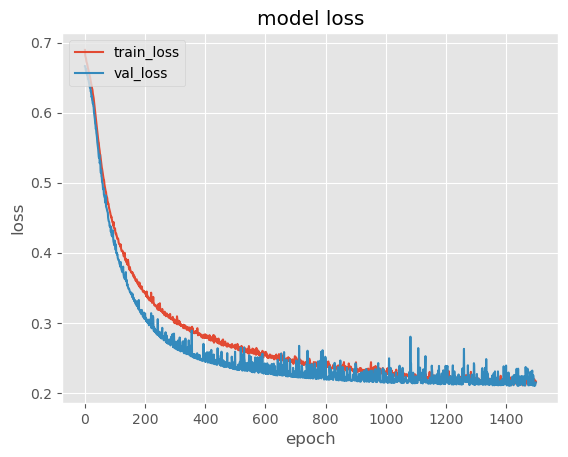

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left')
plt.show()

Train accuracy: 0.9187
Test accuracy: 0.8938
F1 score: 0.861


<AxesSubplot: >

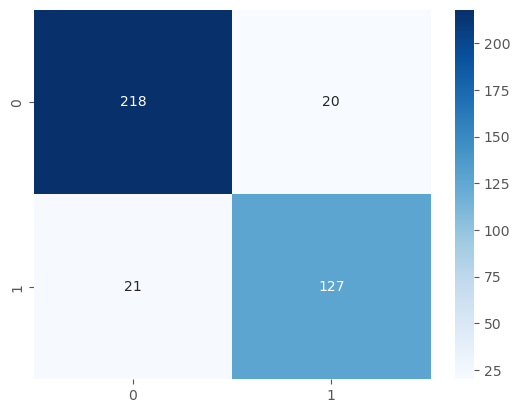

In [27]:
#convert to 0 or 1
preds = (model.predict(x_test_covid) > 0.5).astype(int)

print(f'Train accuracy: {model.evaluate(x_train_covid, y_train_covid, verbose = 0)[1]:.4f}')
print(f'Test accuracy: {model.evaluate(x_test_covid, y_test_covid, verbose = 0)[1]:.4f}')
print(f"F1 score: {f1_score(y_test_covid, preds):.3f}")

cm = metrics.confusion_matrix(y_test_covid, preds)
sns.heatmap(cm, cmap = "Blues", annot=True, fmt='d')

In [266]:
%%time

###############CV###############
#reproducability
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

inputs = np.concatenate((x_train_covid, x_test_covid), axis=0)
targets = np.concatenate((y_train_covid, y_test_covid), axis=0)
acc_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=10, shuffle=True)

# K-fold Cross Validation model evaluation
for train, test in kfold.split(inputs, targets):
    model = Sequential([
                        Dense(100, input_shape=(x_train_covid.shape[1],), activation = "relu",  kernel_initializer='glorot_uniform'),
                        Dense(50, activation = "relu"),
                        Dense(1, activation = "sigmoid")
                        ])

    # Compile the model
    model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
                metrics=['accuracy'])

    # Fit data to model
    history = model.fit(inputs[train], targets[train], batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, verbose = 0)

    # Generate generalization metrics
    acc_per_fold.append(model.evaluate(inputs[test], targets[test], verbose=0)[1])

print(f"CV accuracy: {np.mean(acc_per_fold)}")
###############CV###############

CV accuracy: 0.8917176425457001
Wall time: 14min 54s
